In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from sklearn.metrics import roc_auc_score

dataset_dir = "C:\\Users\\lynet\\OneDrive\\Documents\\2024fall\\animal\\Test_Set"
# Load the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 600 images belonging to 6 classes.


In [53]:
# Get the true labels and predicted labels
test_labels = test_generator.classes  # True labels
class_names = test_generator.class_indices
test_labels_one_hot = LabelBinarizer().fit_transform(test_labels)

In [61]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Predict the classes for the test set
def create_model(activation, optimizer):
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation=activation),
        Dropout(0.5),
        Dense(15, activation='softmax')  # Assuming 15 classes for classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
optimizer_1 = Adam(learning_rate=0.001)
model_1 = create_model('relu', optimizer_1)
predictions = model_1.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

C:\Users\lynet\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\lynet\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step


In [63]:
# Show a few images that are correctly and incorrectly predicted
def plot_images(images, labels, predictions, correct=True, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 10))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])
        title = f"True: {class_names[labels[i]]}\nPred: {class_names[predictions[i]]}"
        ax.set_title(title, fontsize=10)
        ax.axis('off')
    plt.show()

In [67]:
all_images = []
all_labels = []
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    all_images.extend(images)
    all_labels.extend(labels)


all_images = np.array(all_images)
all_labels = np.array(all_labels)
all_labels_indices = np.argmax(all_labels, axis=1)
correct_idx = np.where(predicted_classes == all_labels_indices)[0]
incorrect_idx = np.where(predicted_classes != all_labels_indices)[0]


correct_images = [all_images[i] for i in correct_idx[:5]]
correct_labels = [all_labels[i] for i in correct_idx[:5]]
correct_predictions = [predicted_classes[i] for i in correct_idx[:5]]

In [69]:
# Make sure the incorrect indices are within the bounds of the test_generator
# Get the number of batches in the test generator
num_batches = len(test_generator)

# Ensure the incorrect indices are valid and not larger than the number of samples in the test set
valid_incorrect_idx = [idx for idx in incorrect_idx if idx < num_batches * test_generator.batch_size]

# Get the first 5 incorrect images
incorrect_images = []
incorrect_labels = []
incorrect_predictions = []

# Loop over the valid incorrect indices and extract the images, labels, and predictions
for idx in valid_incorrect_idx[:5]:
    # Get the batch index and the position within the batch
    batch_idx = idx // test_generator.batch_size
    position_in_batch = idx % test_generator.batch_size
    
    # Get the batch of data
    batch = test_generator[batch_idx]
    images, labels = batch
    incorrect_images.append(images[position_in_batch])
    incorrect_labels.append(labels[position_in_batch])
    incorrect_predictions.append(predicted_classes[idx])


Correct Predictions:


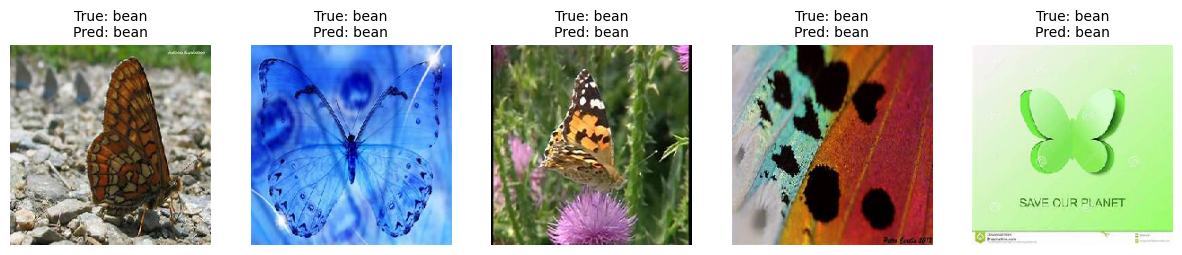

Incorrect Predictions:


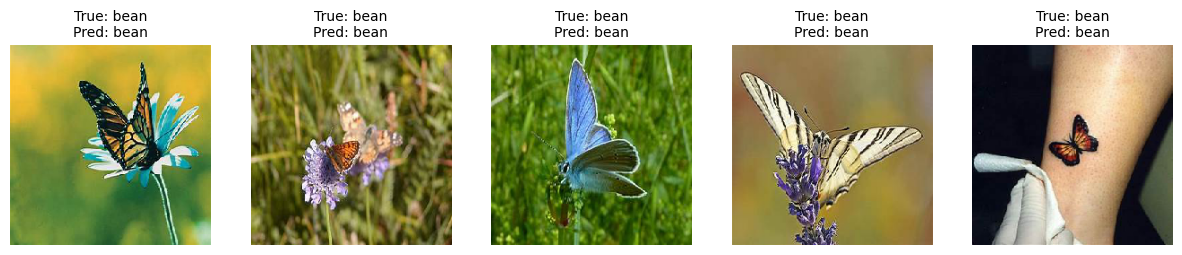

In [71]:
import matplotlib.pyplot as plt
import numpy as np


# Define class names 
class_names = ['bean', 'bitter gourd', 'bottle gourd', 'brinjal', 'broccoli', 
               'cabbage', 'capsicum', 'carrot', 'cauliflower', 'cucumber', 
               'papaya', 'potato', 'pumpkin', 'radish', 'tomato']


def plot_images(images, labels, predictions, correct, num_images=5):
  
    if len(images) == 0:
        print("No images to display.")
        return
    
    
    num_images = min(len(images), num_images)
    
  
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    if num_images == 1: 
        axes = [axes]
    

    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])

        
        true_label = labels[i] if isinstance(labels[i], (int, np.int32)) else np.argmax(labels[i])
        pred_label = predictions[i] if isinstance(predictions[i], (int, np.int32)) else np.argmax(predictions[i])

        
        title = f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}"
        ax.set_title(title, fontsize=10)
        ax.axis('off')

    plt.show()

# Correct Predictions
print("Correct Predictions:")
plot_images(correct_images, correct_labels, correct_predictions, correct=True, num_images=5)

# Incorrect Predictions
print("Incorrect Predictions:")
plot_images(incorrect_images, incorrect_labels, incorrect_predictions, correct=False, num_images=5)


In [73]:
import numpy as np


labels = np.array([0, 1, 2, 3, 4, 5, 6])  
predictions = np.array([0, 1, 1, 3, 4, 2, 6])  


if len(labels) != len(predictions):
    print(f"Length mismatch: labels ({len(labels)}), predictions ({len(predictions)})")
else:
    print(f"Length of labels: {len(labels)}, Length of predictions: {len(predictions)}")


try:
    for i in range(len(labels)):  
        print(f"labels[{i}]: {labels[i]}, predictions[{i}]: {predictions[i]}")
except IndexError as e:
    print(f"IndexError encountered: {e}")


correct_idx = np.where(predictions == labels)[0]
incorrect_idx = np.where(predictions != labels)[0]


print("\nCorrect Predictions:")
for i in correct_idx:
    if i < len(labels):  
        print(f"Correct: labels[{i}]: {labels[i]}, predictions[{i}]: {predictions[i]}")
    else:
        print(f"Invalid index in correct_idx: {i}")


print("\nIncorrect Predictions:")
for i in incorrect_idx:
    if i < len(labels): 
        print(f"Incorrect: labels[{i}]: {labels[i]}, predictions[{i}]: {predictions[i]}")
    else:
        print(f"Invalid index in incorrect_idx: {i}")


Length of labels: 7, Length of predictions: 7
labels[0]: 0, predictions[0]: 0
labels[1]: 1, predictions[1]: 1
labels[2]: 2, predictions[2]: 1
labels[3]: 3, predictions[3]: 3
labels[4]: 4, predictions[4]: 4
labels[5]: 5, predictions[5]: 2
labels[6]: 6, predictions[6]: 6

Correct Predictions:
Correct: labels[0]: 0, predictions[0]: 0
Correct: labels[1]: 1, predictions[1]: 1
Correct: labels[3]: 3, predictions[3]: 3
Correct: labels[4]: 4, predictions[4]: 4
Correct: labels[6]: 6, predictions[6]: 6

Incorrect Predictions:
Incorrect: labels[2]: 2, predictions[2]: 1
Incorrect: labels[5]: 5, predictions[5]: 2


C:\Users\lynet\AppData\Local\Temp\ipykernel_22892\2141280212.py:13: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


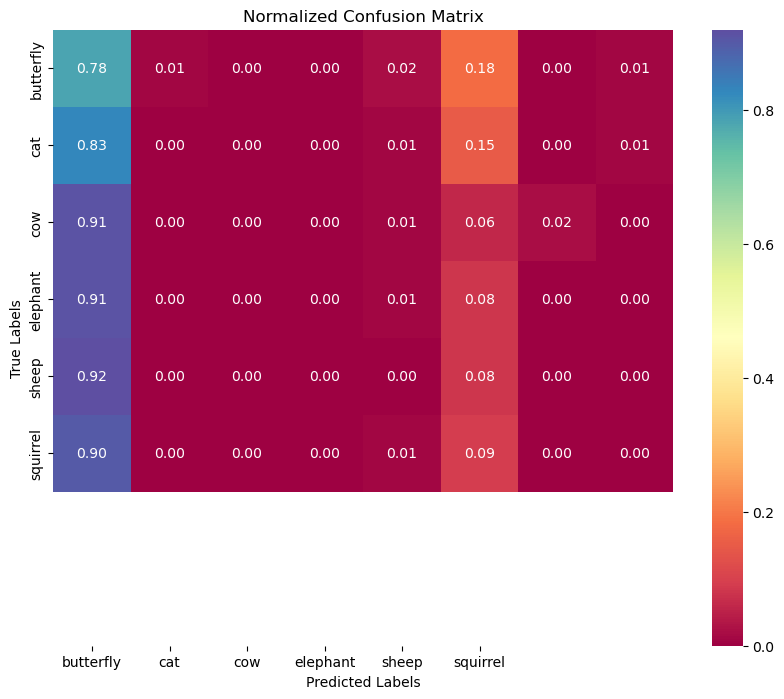

In [75]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming class_names is a list of class names (e.g., ['Tomato', 'Cucumber', ...])
class_names = list(test_generator.class_indices.keys())  # or manually define the class names

# Confusion Matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix with a more colorful colormap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Spectral', fmt='.2f', xticklabels=class_names, yticklabels=class_names)

# Adding title and labels
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [81]:
# Classification Report
report = classification_report(test_labels, predicted_classes, target_names=None, output_dict=True)
print("Classification Report:")
print(report)


Classification Report:
{'0': {'precision': 0.14857142857142858, 'recall': 0.78, 'f1-score': 0.2496, 'support': 100.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, '5': {'precision': 0.140625, 'recall': 0.09, 'f1-score': 0.10975609756097561, 'support': 100.0}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '12': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, 'accuracy': 0.145, 'macro avg': {'precision': 0.03614955357142857, 'recall': 0.10875, 'f1-score': 0.04491951219512195, 'support': 600.0}, 'weighted avg': {'precision': 0.04819940476190476, 'recall': 0.145, 'f1-score': 0.05989268292682927, 'support': 600.0}}


C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lynet\anaconda3\Lib\site-packages\sklea

In [105]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Example arrays for demonstration
predictions = np.array([0.8, 0.4, 0.6])  # Replace with your actual predictions array
test_labels_one_hot = np.array([[1, 0], [0, 1], [1, 0]])  # Replace with your actual test labels

print(f"Shape of predictions: {predictions.shape}")

# Fix dimensionality handling
if len(predictions.shape) == 1:  # Handle 1D case
    test_labels = test_labels_one_hot.ravel()  # Flatten the test labels
    predicted_probs = predictions  # Use predictions directly
else:  # Handle 2D case
    num_classes = predictions.shape[1]
    test_labels = np.argmax(test_labels_one_hot, axis=1)  # Convert one-hot labels to class indices

    # Select the target class
    target_class = 0
    test_labels_binary = (test_labels == target_class).astype(int)  # Convert to binary labels
    predicted_probs = predictions[:, target_class]  # Extract probabilities for the target class

# Ensure that test_labels_binary and predicted_probs are of the correct shape and values
print(f"test_labels_binary: {test_labels_binary}")
print(f"predicted_probs: {predicted_probs}")

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(test_labels_binary, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for Class {target_class}')
plt.legend(loc='lower right')
plt.show()



Shape of predictions: (3,)
test_labels_binary: [[0 1 1 1 1 1]
 [0 1 1 1 1 1]
 [0 1 1 1 1 1]
 ...
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]]
predicted_probs: [0.8 0.4 0.6]


ValueError: multilabel-indicator format is not supported

In [117]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Example arrays for demonstration (replace these with your actual data)
predictions = np.array([0.8, 0.4, 0.6])  # Example probabilities for binary classification
test_labels_one_hot = np.array([[1, 0], [0, 1], [1, 0]])  # Example one-hot encoded labels for binary classification

# Check if predictions is 1D or 2D
print(f"Shape of predictions: {predictions.shape}")
print(f"Shape of test_labels_one_hot: {test_labels_one_hot.shape}")

if len(predictions.shape) == 1:  # Binary classification (1D predictions)
    test_labels = test_labels_one_hot.ravel()  # Flatten the test labels (binary case)
    predicted_probs = predictions  # Use predictions directly
    
    # Check if the lengths match
    print(f"Shape of test_labels: {test_labels.shape}")
    print(f"Shape of predicted_probs: {predicted_probs.shape}")
    
    # Compute Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(test_labels, predicted_probs)
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()
else:  # Multiclass classification (2D predictions)
    num_classes = predictions.shape[1]
    
    for target_class in range(num_classes):
        test_labels_binary = test_labels_one_hot[:, target_class]  # Extract binary labels for the class
        predicted_probs = predictions[:, target_class]  # Extract probabilities for the target class
        
        # Check if the lengths match
        print(f"Shape of test_labels_binary: {test_labels_binary.shape}")
        print(f"Shape of predicted_probs: {predicted_probs.shape}")
        
        # Compute Precision-Recall curve and AUC for the current class
        precision, recall, _ = precision_recall_curve(test_labels_binary, predicted_probs)
        pr_auc = auc(recall, precision)
        
        # Plot Precision-Recall curve
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for Class {target_class}')
        plt.legend(loc='lower left')
        plt.show()


Shape of predictions: (3,)
Shape of test_labels_one_hot: (3, 2)
Shape of test_labels: (6,)
Shape of predicted_probs: (3,)


ValueError: Found input variables with inconsistent numbers of samples: [6, 3]

In [119]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelBinarizer

# Function for majority voting ensemble
def ensemble_predict(models, test_generator):
    predictions = np.zeros((test_generator.samples, len(class_names)))  # Placeholder for predictions
    for model in models:
        model_predictions = model.predict(test_generator, verbose=1)
        predictions += model_predictions  # Sum predictions from all models

    ensemble_predictions = np.argmax(predictions, axis=1)
    return ensemble_predictions

In [121]:
# Get true labels for evaluation
test_labels = test_generator.classes
class_names = test_generator.class_indices
test_labels_one_hot = LabelBinarizer().fit_transform(test_labels)  


In [125]:
# Model 2: Leaky ReLU, SGD optimizer
from tensorflow.keras.layers import LeakyReLU
optimizer_2 = SGD(learning_rate=0.001)
model_2 = create_model(LeakyReLU(alpha=0.1), optimizer_2)  # Use LeakyReLU

# Model 3: ReLU, RMSprop optimizer
optimizer_3 = RMSprop(learning_rate=0.001)
model_3 = create_model('relu', optimizer_3)

# Combine the trained models
models = [model_1, model_2, model_3]

C:\Users\lynet\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\lynet\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [167]:
import numpy as np

def ensemble_predict(models, test_generator):
    predictions = np.zeros_like(models[0].predict(test_generator, verbose=1))  # Initialize with the same shape as model 0's predictions
    for model in models:
        model_predictions = model.predict(test_generator, verbose=1)
        predictions += model_predictions  # Sum predictions from all models
    
    # Average the predictions if you want a majority vote or soft voting
    ensemble_predictions = np.argmax(predictions, axis=1)
    return ensemble_predictions

# Now call the ensemble_predict function and compute confusion matrix
ensemble_predictions = ensemble_predict(models, test_generator)

# Assuming test_labels is the true labels, compute confusion matrix
cm_ensemble = confusion_matrix(test_labels, ensemble_predictions)

# Normalize confusion matrix
cm_ensemble_normalized = cm_ensemble.astype('float') / cm_ensemble.sum(axis=1)[:, np.newaxis]


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step


In [169]:
# Confusion Matrix
ensemble_predictions = ensemble_predict(models, test_generator)
cm_ensemble = confusion_matrix(test_labels, ensemble_predictions)
cm_ensemble_normalized = cm_ensemble.astype('float') / cm_ensemble.sum(axis=1)[:, np.newaxis]

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


In [171]:
# Classification Report
ensemble_predictions = ensemble_predict(models, test_generator)
report_ensemble = classification_report(test_labels, ensemble_predictions, target_names=class_names.keys(), output_dict=True)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step


C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
Shape of test_labels_one_hot: (600, 6)
Shape of predicted_probs: (600, 15)


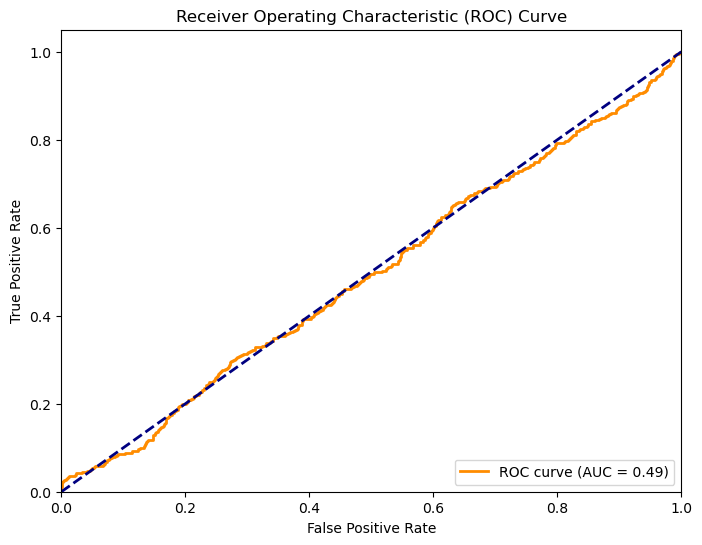

In [179]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming predictions from models
predictions_list = [model.predict(test_generator, verbose=1) for model in models]
predicted_probs = np.mean(predictions_list, axis=0)  # Averaging model predictions

# Check the shapes of predictions and labels
print(f"Shape of test_labels_one_hot: {test_labels_one_hot.shape}")
print(f"Shape of predicted_probs: {predicted_probs.shape}")

# Ensure predicted_probs matches the number of classes in test_labels_one_hot (6 classes)
predicted_probs = predicted_probs[:, :6]  # Take only the first 6 classes

# Ensure that test_labels_one_hot is flattened for binary classification
y_true = test_labels_one_hot.ravel()

# Flatten predicted probabilities if necessary
y_score = predicted_probs.ravel()

# Check if the lengths match
if len(y_true) != len(y_score):
    print(f"Inconsistent number of samples: {len(y_true)} vs {len(y_score)}")
else:
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()



19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


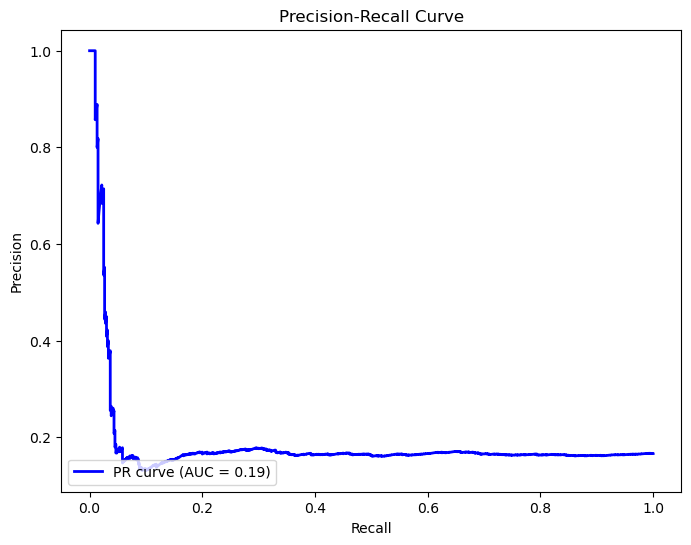

In [183]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predictions from all models
predictions_list = [model.predict(test_generator, verbose=1) for model in models]

# Average the predictions from the models (600 samples × 15 classes)
predicted_probs = np.mean(predictions_list, axis=0)

# Ensure the predicted probabilities match the number of classes in the labels (6 classes)
predicted_probs = predicted_probs[:, :6]  # Slice to match 6 classes

# Flatten true labels and predicted probabilities
y_true = test_labels_one_hot.ravel()
y_score = predicted_probs.ravel()

# Check consistency of lengths
if len(y_true) != len(y_score):
    print(f"Inconsistent number of samples: {len(y_true)} vs {len(y_score)}")
else:
    # Compute Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()


In [185]:
# Plot the results
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names.keys(), yticklabels=class_names.keys())
    plt.title('Normalized Confusion Matrix - Ensemble')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


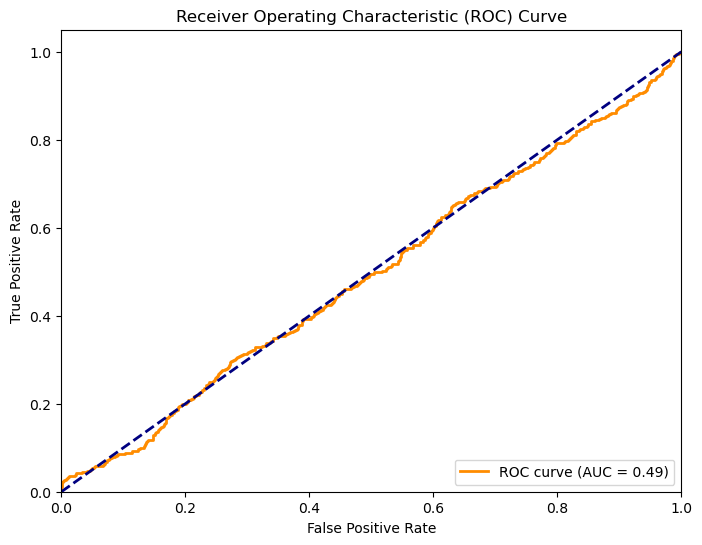

In [189]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predictions from all models
predictions_list = [model.predict(test_generator, verbose=1) for model in models]

# Average the predictions from the models (600 samples × 15 classes)
predicted_probs = np.mean(predictions_list, axis=0)

# Slice the predictions to match the number of classes in test_labels_one_hot (6 classes)
predicted_probs = predicted_probs[:, :6]  # Take only the first 6 classes

# Flatten true labels and predicted probabilities
y_true = test_labels_one_hot.ravel()
y_score = predicted_probs.ravel()

# Check consistency of lengths
if len(y_true) != len(y_score):
    print(f"Inconsistent number of samples: {len(y_true)} vs {len(y_score)}")
else:
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
Shape of test_labels_one_hot: (600, 6)
Shape of predicted_probs: (600, 15)


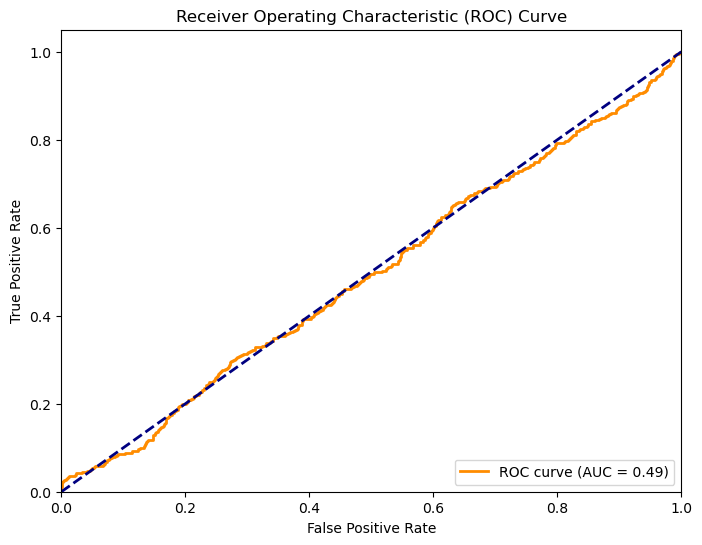

In [193]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predictions from all models (make sure they have the same shape)
predictions_list = [model.predict(test_generator) for model in models]

# Averaging model predictions
predicted_probs = np.mean(predictions_list, axis=0)

# Check the shapes of predictions and labels
print(f"Shape of test_labels_one_hot: {test_labels_one_hot.shape}")
print(f"Shape of predicted_probs: {predicted_probs.shape}")

# Ensure that the predicted_probs matches the number of classes in test_labels_one_hot (6 classes)
predicted_probs = predicted_probs[:, :6]  # Slice to match 6 classes

# Flatten true labels and predicted probabilities
y_true = test_labels_one_hot.ravel()
y_score = predicted_probs.ravel()

# Check consistency of lengths
if len(y_true) != len(y_score):
    print(f"Inconsistent number of samples: {len(y_true)} vs {len(y_score)}")
else:
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


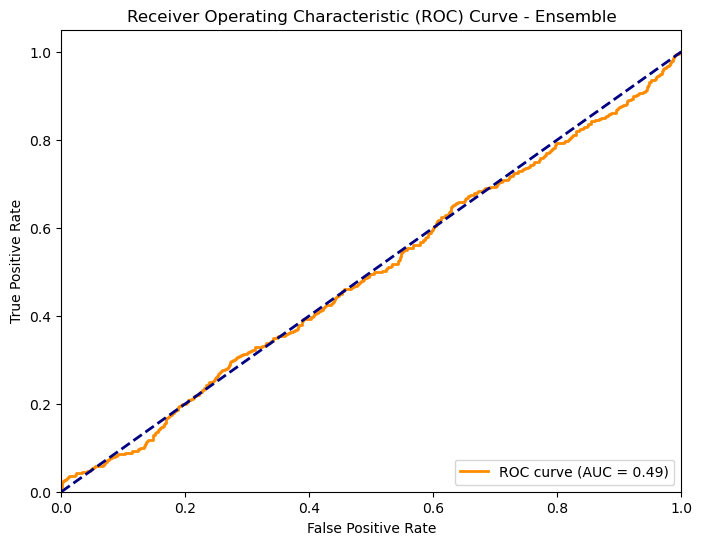

In [197]:
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc_ensemble = auc(fpr, tpr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Ensemble')
plt.legend(loc='lower right')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step
Shape of test_labels_one_hot: (600, 6)
Shape of predicted_probs: (600, 15)


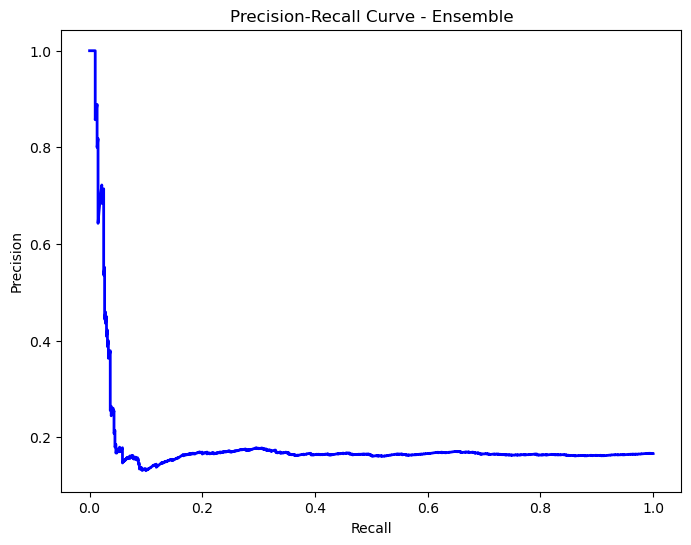

In [201]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predictions from all models (make sure they have the same shape)
predictions_list = [model.predict(test_generator) for model in models]

# Average the predictions from the models (600 samples × 15 classes)
predicted_probs = np.mean(predictions_list, axis=0)

# Check the shapes of predictions and labels
print(f"Shape of test_labels_one_hot: {test_labels_one_hot.shape}")
print(f"Shape of predicted_probs: {predicted_probs.shape}")

# Ensure the predicted probabilities match the number of classes in test_labels_one_hot (6 classes)
predicted_probs = predicted_probs[:, :6]  # Take only the first 6 classes

# Flatten true labels and predicted probabilities
y_true = test_labels_one_hot.ravel()
y_score = predicted_probs.ravel()

# Check consistency of lengths
if len(y_true) != len(y_score):
    print(f"Inconsistent number of samples: {len(y_true)} vs {len(y_score)}")
else:
    # Compute Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Ensemble')
    plt.show()


In [203]:
# Display Classification Report and Confusion Matrix
print("Ensemble Classification Report:")
print(report_ensemble)

Ensemble Classification Report:
{'butterfly': {'precision': 0.1652754590984975, 'recall': 0.99, 'f1-score': 0.2832618025751073, 'support': 100.0}, 'cat': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, 'cow': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, 'elephant': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, 'sheep': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, 'squirrel': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 100.0}, 'accuracy': 0.165, 'macro avg': {'precision': 0.027545909849749584, 'recall': 0.165, 'f1-score': 0.04721030042918455, 'support': 600.0}, 'weighted avg': {'precision': 0.027545909849749584, 'recall': 0.165, 'f1-score': 0.04721030042918455, 'support': 600.0}}


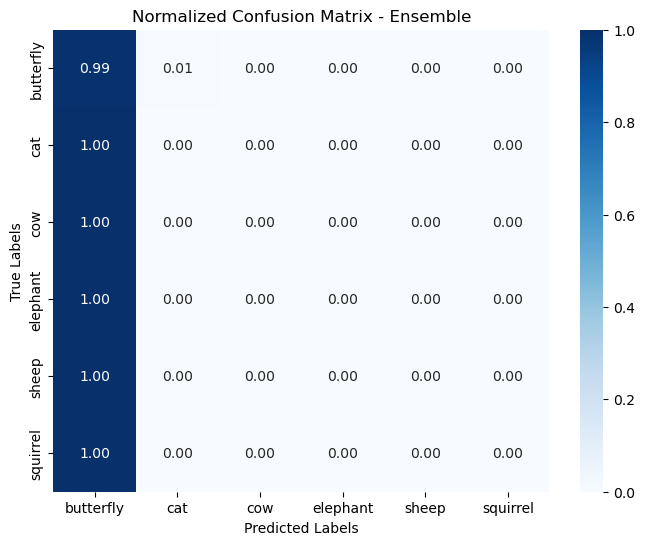

In [205]:
# Display confusion matrix
plot_confusion_matrix(cm_ensemble_normalized, class_names)

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

models = [model_1, model_2, model_3]

# Step 1: Get model accuracies
model_accuracies = [model.evaluate(test_generator, verbose=0)[1] for model in models]
model_names = ["Model 1: Baseline", "Model 2: Activation Optimized", "Model 3: Strides Optimized"]

# Generate Bar Plot for Model Comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, model_accuracies, color=['skyblue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy on Test Set')
plt.xticks(rotation=45)
plt.show()

# Step 2: Get predictions from each model
predictions_model_1 = model_1.predict(test_generator)  # For model 1
predictions_model_2 = model_2.predict(test_generator)  # For model 2
predictions_model_3 = model_3.predict(test_generator)  # For model 3

# Step 3: Create ensemble prediction 
final_predictions = np.mean([predictions_model_1, predictions_model_2, predictions_model_3], axis=0)

# Step 4: Compare predictions across models and ensemble
comparison_data = {
    "Ground Truth": test_generator.classes,  # Actual class labels
    "Model 1 Predictions": np.argmax(predictions_model_1, axis=1),  # Get the predicted class indices
    "Model 2 Predictions": np.argmax(predictions_model_2, axis=1),
    "Model 3 Predictions": np.argmax(predictions_model_3, axis=1),
    "Ensemble Predictions": np.argmax(final_predictions, axis=1)  # Assuming the predictions are probabilities
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(comparison_data)

# Save results to CSV
comparison_df.to_csv("model_predictions_comparison.csv", index=False)
print("Prediction comparison saved to 'model_predictions_comparison.csv'")

In [223]:
import numpy as np
import matplotlib.pyplot as plt

# Collect predictions from all models
ensemble_predictions = []
for model in models:
    predictions = model.predict(test_generator, verbose=0)
    ensemble_predictions.append(predictions)

# Average predictions across models 
ensemble_predictions = np.mean(ensemble_predictions, axis=0)

# Get final class predictions by taking the argmax
ensemble_class_predictions = np.argmax(ensemble_predictions, axis=1)

# Get true labels from the test generator
true_labels = test_generator.classes  # Assumes the generator has `.classes`

# Calculate ensemble accuracy
ensemble_accuracy = np.mean(ensemble_class_predictions == true_labels)

# Compare model accuracies
model_accuracies = [model.evaluate(test_generator, verbose=0)[1] for model in models]
model_names = ["Model 1: Baseline", "Model 2: Activation Optimized", "Model 3: Strides Optimized"]

# Add ensemble accuracy
model_accuracies.append(ensemble_accuracy)
model_names.append("Ensemble")

# Plot accuracies
plt.figure(figsize=(8, 6))
plt.bar(model_names, model_accuracies, color=['skyblue', 'orange', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy on Test Set')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy range
plt.show()



In [ ]:
# Assuming you have train_generator, validation_generator, and test_generator set up

# Model 1
model_1 = create_model_1(input_shape=(224, 224, 3), num_classes=train_generator.num_classes)
history_1 = model_1.fit(train_generator, epochs=20, validation_data=validation_generator)

# Model 2
model_2 = create_model_2(input_shape=(224, 224, 3), num_classes=train_generator.num_classes)
history_2 = model_2.fit(train_generator, epochs=20, validation_data=validation_generator)

# Model 3
model_3 = create_model_3(input_shape=(224, 224, 3), num_classes=train_generator.num_classes)
history_3 = model_3.fit(train_generator, epochs=20, validation_data=validation_generator)

# Evaluation for Model 1
precision_1, recall_1, f1_1, auc_1 = evaluate_model(model_1, test_generator)
precision_2, recall_2, f1_2, auc_2 = evaluate_model(model_2, test_generator)
precision_3, recall_3, f1_3, auc_3 = evaluate_model(model_3, test_generator)

# Displaying the results
print(f"Model 1 Precision: {precision_1}, Recall: {recall_1}, F1: {f1_1}, AUC: {auc_1}")
print(f"Model 2 Precision: {precision_2}, Recall: {recall_2}, F1: {f1_2}, AUC: {auc_2}")
print(f"Model 3 Precision: {precision_3}, Recall: {recall_3}, F1: {f1_3}, AUC: {auc_3}")



In [227]:
predictions_model_1 = model_1.predict(test_generator)  # For model 1
predictions_model_2 = model_2.predict(test_generator)  # For model 2
predictions_model_3 = model_3.predict(test_generator)  # For model 3

# Proceed with further analysis as before...


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Collect predictions from all models (ensure consistency in the number of classes)
ensemble_predictions = []
for model in models:
    predictions = model.predict(test_generator, verbose=0)
    
    # Slice predictions to match the number of classes in the dataset (6 classes)
    predictions = predictions[:, :6]  # Take only the first 6 classes (assuming dataset has 6 classes)
    
    ensemble_predictions.append(predictions)

# Average predictions across models 
ensemble_predictions = np.mean(ensemble_predictions, axis=0)

# Get final class predictions by taking the argmax (get class with the highest probability)
ensemble_class_predictions = np.argmax(ensemble_predictions, axis=1)

# Get true labels from the test generator (assumes .classes gives the true labels)
true_labels = test_generator.classes

# Calculate ensemble accuracy by comparing predictions to true labels
ensemble_accuracy = np.mean(ensemble_class_predictions == true_labels)

# Compare model accuracies
model_accuracies = [model.evaluate(test_generator, verbose=0)[1] for model in models]
model_names = ["Model 1: Baseline", "Model 2: Activation Optimized", "Model 3: Strides Optimized"]

# Add ensemble accuracy to the list of model accuracies
model_accuracies.append(ensemble_accuracy)
model_names.append("Ensemble")

# Plot accuracies
plt.figure(figsize=(8, 6))
plt.bar(model_names, model_accuracies, color=['skyblue', 'orange', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy on Test Set')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set accuracy range from 0 to 1
plt.show()




In [ ]:
import pandas as pd

# Results for individual models and ensemble
results = pd.DataFrame({
    'Model': ['Model 1 (Adam)', 'Model 2 (SGD)', 'Model 3 (RMSprop)', 'Ensemble'],
    'Precision': [precision_1, precision_2, precision_3, ensemble_precision],
    'Recall': [recall_1, recall_2, recall_3, ensemble_recall],
    'F1 Score': [f1_1, f1_2, f1_3, ensemble_f1],
    'AUC': [auc_1, auc_2, auc_3, ensemble_auc]
})

print(results)
